## 甘州图灵封神榜 2024-06-04 上榜数据分析

In [4]:
from IPython.display import Markdown, display
import pywencai
import pandas as pd
from datetime import datetime
import akshare as ak
import time

import warnings

# 忽略所有警告信息
warnings.filterwarnings('ignore')

current_time = datetime.now().strftime("%Y-%m-%d %H:%M")

In [207]:
data_type ={
    '上榜时间': str, 
    '股票代码': str, 
    '股票名称': str, 
    '现价': float, 
    '涨跌幅': float, 
    '成交额': float
  }

df = pd.read_csv("leaderboard.csv",dtype=data_type)
df['date'] = pd.to_datetime(df['上榜时间'])
df['日期'] = df['date'].dt.date
today = pd.to_datetime('today').date()
# print(today)
df = df[df['日期'] == (pd.to_datetime('today') - pd.Timedelta(days=1)).date()]
df['date'] = pd.to_datetime(df['上榜时间'])
df = df.set_index('date')
df_all=df


2024-06-05


In [208]:
# 按'股票代码'分组并计算累计计数
df['cumcount'] = df.groupby('股票代码').cumcount()

# 筛选出每个股票代码第一次上榜的记录（cumcount为0）
df_first_occurrence = df[df['cumcount'] == 0]

# 删除辅助列'cumcount'
df_first_occurrence.drop(columns=['上榜时间','日期','cumcount'], inplace=True)

# 显示结果
# print(df_first_occurrence)

df_first_occurrence=df_first_occurrence
print(df_first_occurrence)

                       股票代码  股票名称     现价    涨跌幅        成交额  上榜涨幅  榜间涨幅
date                                                                  
2024-06-04 09:35:53  300476  胜宏科技  30.60   4.69   32232.34   NaN   NaN
2024-06-04 09:35:53  002463  沪电股份  33.74   0.87   17336.11   NaN   NaN
2024-06-04 09:39:19  002736  国信证券   9.23   0.65    6526.43   NaN   NaN
2024-06-04 09:49:33  605058  澳弘电子  19.62   2.29    3677.59   NaN   NaN
2024-06-04 10:03:53  600572   康恩贝   5.34   2.50    8829.16   NaN   NaN
2024-06-04 10:03:53  600976  健民集团  66.46   2.99    4271.78   NaN   NaN
2024-06-04 10:48:25  601328  交通银行   7.15   0.85   35147.34   NaN   NaN
2024-06-04 13:23:41  300552  万集科技  39.09  15.62  139725.32   NaN   NaN
2024-06-04 13:23:41  600996  贵广网络   8.82   1.38   66900.38   NaN   NaN
2024-06-04 13:23:41  300650  太龙股份  12.27   1.66   64733.66   NaN   NaN
2024-06-04 13:23:41  300822  贝仕达克  16.98  15.67   45486.60   NaN   NaN
2024-06-04 13:23:41  301339   通行宝  21.50   6.59   42414.79   NaN   NaN
2024-0

In [209]:
# 获取沪深A股的今日OHLC数据
def get_today_ohlc(stock_code):
    symbol = f"sh{stock_code}" if stock_code[:1] == '6' else f"bj{stock_code}" if stock_code[:1] == '8'  else  f"sz{stock_code}"
    start_date: str = "20240603"
    stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol=symbol,start_date=start_date)
    time.sleep(1)
    if stock_zh_a_daily_df.empty:
        return pd.Series([None] * 4, index=['open', 'high', 'low', 'close'])
    else:
        # print(stock_zh_a_daily_df)
        return stock_zh_a_daily_df.iloc[-1]

# 使用apply函数简化循环，并确保返回的Series长度与DataFrame行数匹配
ohlc_columns = ['open', 'high', 'low', 'close']
dff = df_first_occurrence
# df
dff = dff.apply(lambda row: get_today_ohlc(row['股票代码']), axis=1)[ohlc_columns]
# print(dff)
# print(df_first_occurrence)
df_first_occurrence = pd.concat([df_first_occurrence, dff], axis=1)
# 显示更新后的DataFrame
print(df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅', 'close']])

                       股票代码  股票名称     现价    涨跌幅  close
date                                                  
2024-06-04 09:35:53  300476  胜宏科技  30.60   4.69  30.91
2024-06-04 09:35:53  002463  沪电股份  33.74   0.87  33.61
2024-06-04 09:39:19  002736  国信证券   9.23   0.65   9.12
2024-06-04 09:49:33  605058  澳弘电子  19.62   2.29  18.93
2024-06-04 10:03:53  600572   康恩贝   5.34   2.50   5.38
2024-06-04 10:03:53  600976  健民集团  66.46   2.99  66.00
2024-06-04 10:48:25  601328  交通银行   7.15   0.85   7.21
2024-06-04 13:23:41  300552  万集科技  39.09  15.62  40.57
2024-06-04 13:23:41  600996  贵广网络   8.82   1.38   8.65
2024-06-04 13:23:41  300650  太龙股份  12.27   1.66  12.50
2024-06-04 13:23:41  300822  贝仕达克  16.98  15.67  17.62
2024-06-04 13:23:41  301339   通行宝  21.50   6.59  22.09
2024-06-04 13:23:41  300447  全信股份  15.38   4.91  15.38
2024-06-04 13:23:41  301083  百胜智能  16.39  13.50  15.93
2024-06-04 13:23:41  300952  恒辉安防  22.50   5.63  22.45
2024-06-04 13:23:41  000726   鲁泰A   7.36   5.14   7.39
2024-06-04

### 计算每笔交易的日收益率

In [210]:
df_first_occurrence['日收益率'] =round(100 * (df_first_occurrence['close'] - df_first_occurrence['现价']) /
                                    df_first_occurrence['现价'],2) 
df = df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅',  'close','日收益率']]


def create_markdown_link(row):
    stock_code = row['股票代码']
    stock_name = row['股票名称']
    # 构建Markdown超链接字符串
    link = f"[{stock_name}](https://www.iwencai.com/unifiedwap/result?w={stock_code}&querytype=stock)"
    return link

# 使用apply函数为股票名称添加Markdown超链接
df['股票名称'] = df.apply(lambda row: create_markdown_link(row), axis=1)
display(Markdown(df.to_markdown()))


| date                |   股票代码 | 股票名称                                                                       |   现价 |   涨跌幅 |   close |   日收益率 |
|:--------------------|-----------:|:-------------------------------------------------------------------------------|-------:|---------:|--------:|-----------:|
| 2024-06-04 09:35:53 |     300476 | [胜宏科技](https://www.iwencai.com/unifiedwap/result?w=300476&querytype=stock) |  30.6  |     4.69 |   30.91 |       1.01 |
| 2024-06-04 09:35:53 |     002463 | [沪电股份](https://www.iwencai.com/unifiedwap/result?w=002463&querytype=stock) |  33.74 |     0.87 |   33.61 |      -0.39 |
| 2024-06-04 09:39:19 |     002736 | [国信证券](https://www.iwencai.com/unifiedwap/result?w=002736&querytype=stock) |   9.23 |     0.65 |    9.12 |      -1.19 |
| 2024-06-04 09:49:33 |     605058 | [澳弘电子](https://www.iwencai.com/unifiedwap/result?w=605058&querytype=stock) |  19.62 |     2.29 |   18.93 |      -3.52 |
| 2024-06-04 10:03:53 |     600572 | [康恩贝](https://www.iwencai.com/unifiedwap/result?w=600572&querytype=stock)   |   5.34 |     2.5  |    5.38 |       0.75 |
| 2024-06-04 10:03:53 |     600976 | [健民集团](https://www.iwencai.com/unifiedwap/result?w=600976&querytype=stock) |  66.46 |     2.99 |   66    |      -0.69 |
| 2024-06-04 10:48:25 |     601328 | [交通银行](https://www.iwencai.com/unifiedwap/result?w=601328&querytype=stock) |   7.15 |     0.85 |    7.21 |       0.84 |
| 2024-06-04 13:23:41 |     300552 | [万集科技](https://www.iwencai.com/unifiedwap/result?w=300552&querytype=stock) |  39.09 |    15.62 |   40.57 |       3.79 |
| 2024-06-04 13:23:41 |     600996 | [贵广网络](https://www.iwencai.com/unifiedwap/result?w=600996&querytype=stock) |   8.82 |     1.38 |    8.65 |      -1.93 |
| 2024-06-04 13:23:41 |     300650 | [太龙股份](https://www.iwencai.com/unifiedwap/result?w=300650&querytype=stock) |  12.27 |     1.66 |   12.5  |       1.87 |
| 2024-06-04 13:23:41 |     300822 | [贝仕达克](https://www.iwencai.com/unifiedwap/result?w=300822&querytype=stock) |  16.98 |    15.67 |   17.62 |       3.77 |
| 2024-06-04 13:23:41 |     301339 | [通行宝](https://www.iwencai.com/unifiedwap/result?w=301339&querytype=stock)   |  21.5  |     6.59 |   22.09 |       2.74 |
| 2024-06-04 13:23:41 |     300447 | [全信股份](https://www.iwencai.com/unifiedwap/result?w=300447&querytype=stock) |  15.38 |     4.91 |   15.38 |       0    |
| 2024-06-04 13:23:41 |     301083 | [百胜智能](https://www.iwencai.com/unifiedwap/result?w=301083&querytype=stock) |  16.39 |    13.5  |   15.93 |      -2.81 |
| 2024-06-04 13:23:41 |     300952 | [恒辉安防](https://www.iwencai.com/unifiedwap/result?w=300952&querytype=stock) |  22.5  |     5.63 |   22.45 |      -0.22 |
| 2024-06-04 13:23:41 |     000726 | [鲁泰A](https://www.iwencai.com/unifiedwap/result?w=000726&querytype=stock)    |   7.36 |     5.14 |    7.39 |       0.41 |
| 2024-06-04 13:23:41 |     600962 | [国投中鲁](https://www.iwencai.com/unifiedwap/result?w=600962&querytype=stock) |  12.57 |     2.11 |   12.08 |      -3.9  |
| 2024-06-04 13:23:41 |     301229 | [纽泰格](https://www.iwencai.com/unifiedwap/result?w=301229&querytype=stock)   |  24.48 |     5.93 |   24.66 |       0.74 |
| 2024-06-04 13:32:11 |     000400 | [许继电气](https://www.iwencai.com/unifiedwap/result?w=000400&querytype=stock) |  32.62 |     5.6  |   32.94 |       0.98 |
| 2024-06-04 13:32:11 |     601126 | [四方股份](https://www.iwencai.com/unifiedwap/result?w=601126&querytype=stock) |  18.18 |     4.78 |   18.59 |       2.26 |
| 2024-06-04 13:36:08 |     600795 | [国电电力](https://www.iwencai.com/unifiedwap/result?w=600795&querytype=stock) |   5.58 |     2.2  |    5.57 |      -0.18 |
| 2024-06-04 13:59:19 |     600900 | [长江电力](https://www.iwencai.com/unifiedwap/result?w=600900&querytype=stock) |  27.5  |     0.26 |   27.48 |      -0.07 |
| 2024-06-04 13:59:19 |     601985 | [中国核电](https://www.iwencai.com/unifiedwap/result?w=601985&querytype=stock) |  10.12 |     0.9  |   10.13 |       0.1  |
| 2024-06-04 13:59:19 |     600025 | [华能水电](https://www.iwencai.com/unifiedwap/result?w=600025&querytype=stock) |  10.4  |     1.46 |   10.42 |       0.19 |
| 2024-06-04 13:59:19 |     600674 | [川投能源](https://www.iwencai.com/unifiedwap/result?w=600674&querytype=stock) |  18.24 |     0.94 |   18.27 |       0.16 |
| 2024-06-04 14:03:16 |     000883 | [湖北能源](https://www.iwencai.com/unifiedwap/result?w=000883&querytype=stock) |   6.08 |     3.58 |    6.12 |       0.66 |
| 2024-06-04 14:07:29 |     600886 | [国投电力](https://www.iwencai.com/unifiedwap/result?w=600886&querytype=stock) |  17.82 |     0.11 |   17.8  |      -0.11 |
| 2024-06-04 14:11:40 |     000682 | [东方电子](https://www.iwencai.com/unifiedwap/result?w=000682&querytype=stock) |  12.23 |     3.73 |   12.3  |       0.57 |
| 2024-06-04 14:11:40 |     001286 | [陕西能源](https://www.iwencai.com/unifiedwap/result?w=001286&querytype=stock) |  11.22 |     1.17 |   11.23 |       0.09 |
| 2024-06-04 14:11:40 |     000537 | [中绿电](https://www.iwencai.com/unifiedwap/result?w=000537&querytype=stock)   |  11.03 |     0.64 |   10.97 |      -0.54 |
| 2024-06-04 14:11:40 |     301179 | [泽宇智能](https://www.iwencai.com/unifiedwap/result?w=301179&querytype=stock) |  19.76 |    11.64 |   20.4  |       3.24 |
| 2024-06-04 14:24:46 |     002028 | [思源电气](https://www.iwencai.com/unifiedwap/result?w=002028&querytype=stock) |  74.13 |     1.27 |   73.63 |      -0.67 |
| 2024-06-04 14:24:46 |     300001 | [特锐德](https://www.iwencai.com/unifiedwap/result?w=300001&querytype=stock)   |  22.31 |     3.38 |   22.68 |       1.66 |
| 2024-06-04 14:24:46 |     600885 | [宏发股份](https://www.iwencai.com/unifiedwap/result?w=600885&querytype=stock) |  30.21 |     5.01 |   30.19 |      -0.07 |
| 2024-06-04 14:24:46 |     002270 | [华明装备](https://www.iwencai.com/unifiedwap/result?w=002270&querytype=stock) |  22.47 |     1.08 |   22.65 |       0.8  |
| 2024-06-04 14:24:46 |     300932 | [三友联众](https://www.iwencai.com/unifiedwap/result?w=300932&querytype=stock) |  11.05 |    16.19 |   10.73 |      -2.9  |
| 2024-06-04 14:24:46 |     837046 | [亿能电力](https://www.iwencai.com/unifiedwap/result?w=837046&querytype=stock) |   9.56 |    24.16 |    9.76 |       2.09 |
| 2024-06-04 14:33:37 |     600598 | [北大荒](https://www.iwencai.com/unifiedwap/result?w=600598&querytype=stock)   |  13.37 |     3.32 |   13.34 |      -0.22 |
| 2024-06-04 14:38:36 |     300014 | [亿纬锂能](https://www.iwencai.com/unifiedwap/result?w=300014&querytype=stock) |  43.93 |     7.72 |   43.71 |      -0.5  |
| 2024-06-04 14:38:36 |     600875 | [东方电气](https://www.iwencai.com/unifiedwap/result?w=600875&querytype=stock) |  18.99 |     3.43 |   19.05 |       0.32 |
| 2024-06-04 14:38:36 |     300207 | [欣旺达](https://www.iwencai.com/unifiedwap/result?w=300207&querytype=stock)   |  15.64 |     0.13 |   15.64 |       0    |
| 2024-06-04 14:38:36 |     003021 | [兆威机电](https://www.iwencai.com/unifiedwap/result?w=003021&querytype=stock) |  53.5  |     1.1  |   53.45 |      -0.09 |
| 2024-06-04 14:38:36 |     603606 | [东方电缆](https://www.iwencai.com/unifiedwap/result?w=603606&querytype=stock) |  49.65 |     4.48 |   49.58 |      -0.14 |
| 2024-06-04 14:38:36 |     300772 | [运达股份](https://www.iwencai.com/unifiedwap/result?w=300772&querytype=stock) |  11.03 |     4.95 |   11.05 |       0.18 |
| 2024-06-04 14:38:36 |     301082 | [久盛电气](https://www.iwencai.com/unifiedwap/result?w=301082&querytype=stock) |  15.93 |     7.85 |   16.25 |       2.01 |
| 2024-06-04 14:38:36 |     300852 | [四会富仕](https://www.iwencai.com/unifiedwap/result?w=300852&querytype=stock) |  24.86 |     4.02 |   25.1  |       0.97 |
| 2024-06-04 14:52:45 |     603097 | [江苏华辰](https://www.iwencai.com/unifiedwap/result?w=603097&querytype=stock) |  33.01 |     3.54 |   33.3  |       0.88 |
| 2024-06-04 14:57:05 |     603530 | [神马电力](https://www.iwencai.com/unifiedwap/result?w=603530&querytype=stock) |  28.42 |     8.06 |   28.41 |      -0.04 |

### 交易情况统计

In [211]:
# 筛选出盈利和亏损的股票
df_profit = df_first_occurrence[df_first_occurrence['close'] > df_first_occurrence['现价']]
df_loss = df_first_occurrence[df_first_occurrence['close'] < df_first_occurrence['现价']]

# 计算胜率和亏率
total_trades = len(df_first_occurrence)
profit_trades = len(df_profit)
loss_trades = len(df_loss)

win_rate = profit_trades / total_trades
loss_rate = loss_trades / total_trades

print("总交易次数: ", total_trades)
print("胜次数: ", profit_trades)
print("亏次数: ", loss_trades)
print(f"胜率: {win_rate:.2f}")
print(f"亏率: {loss_rate:.2f}")


# 计算总成本和总收益
total_cost = df_first_occurrence['现价'].sum()
total_revenue = df_first_occurrence['close'].sum()

# 计算总体收益率
overall_return = ((total_revenue - total_cost) / total_cost) * 100

print(f"当日浮盈: {overall_return:.2f}%")

总交易次数:  48
胜次数:  26
亏次数:  20
胜率: 0.54
亏率: 0.42
当日浮盈: 0.28%


In [222]:
# 按'股票代码'分组并计算累计计数
df_all['cumcount'] = df_all.groupby('股票代码').cumcount()

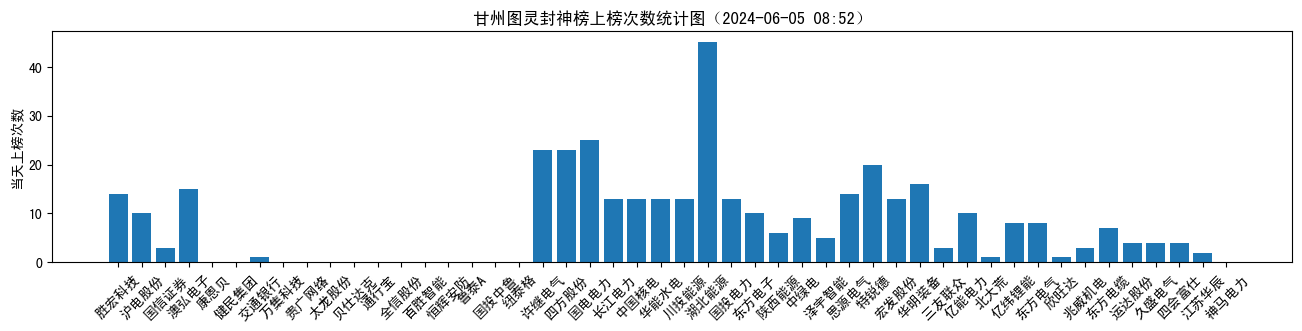

In [223]:

import matplotlib.pyplot as plt
plt.rcParams["font.serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# plt.rcParams['axes.formatter.use_locale'] - False
# print(matplotlib.matplotlib_fname())

# 绘制柱状图
fig1 = plt.figure(figsize=(16, 3))
plt.bar(df_all['股票名称'], df_all['cumcount'])

# 添加标题和标签
plt.title(f'甘州图灵封神榜上榜次数统计图（{current_time}）')
# plt.xlabel('Category')
plt.ylabel('当天上榜次数')
# 显示图例
plt.xticks(rotation=45) 
# ax2.legend()

# # 优化label显示,非必须
# plt.autofmt_xdate()
# fig2.autofmt_xdate()
# 显示图表
plt.show()

<Axes: xlabel='Hour'>

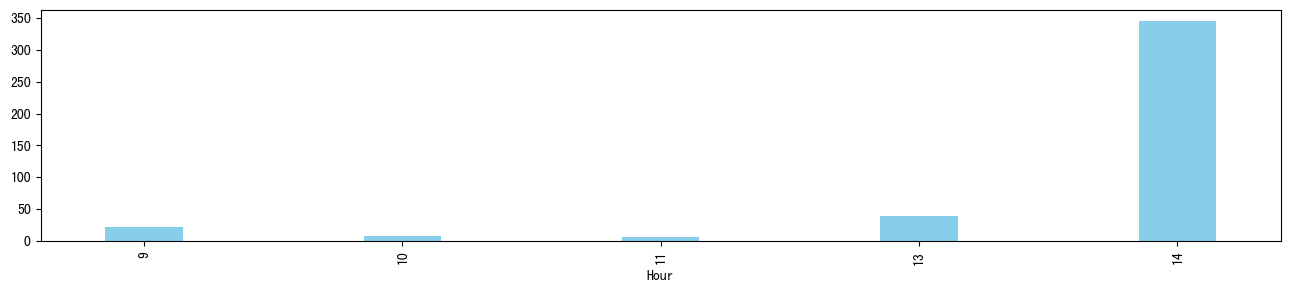

In [224]:
# 创建一个时间段作为分组的依据，例如每小时
df_all['Hour'] = df_all.index.map(lambda x: x.hour)
# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(16, 3))  # 设置图形大小
time_segment_counts.plot(kind='bar', width=0.3, color='skyblue')  # 绘制柱状图

In [217]:
def get_stock_market(stock_code):
    if stock_code.startswith(('60', '68')):
        return "SH"
    elif stock_code.startswith(('0', '3')):
        return "SZ"
    elif stock_code.startswith(('4', '8')):
        return "BJ"
    else:
        return "Unknown"

In [5]:
start_date: str = "20050101"
end_date: str = "20240430"
stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol='sh000016',start_date=start_date,end_date=end_date)
stock_zh_a_daily_df.to_csv("sh000016-days-4693.csv")

In [7]:
start_date: str = "20050101"
end_date: str = "20240430"
stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol='sh000016'  ,start_date=start_date,end_date=end_date)
# stock_zh_a_daily_df.to_csv("sh000016-days-4693.csv")
stock_zh_a_daily_df

,date,open,high,low,close,volume,outstanding_share,turnover
0,2005-01-04,836.99,836.99,824.01,827.07,4.031697e+08,2.241820e+08,1.798404
1,2005-01-05,825.71,836.43,822.97,831.43,3.020863e+08,2.241820e+08,1.347505
2,2005-01-06,831.99,833.07,820.34,822.50,2.753574e+08,2.241820e+08,1.228276
3,2005-01-07,822.67,832.95,819.44,823.62,3.066086e+08,2.241820e+08,1.367677
4,2005-01-10,823.77,833.65,821.00,832.99,2.479411e+08,2.241820e+08,1.105981
...,...,...,...,...,...,...,...,...
4689,2024-04-24,2422.63,2426.96,2406.88,2424.12,2.938686e+09,1.596594e+09,1.840597
4690,2024-04-25,2419.50,2437.31,2411.57,2431.62,2.831782e+09,1.596594e+09,1.773639
4691,2024-04-26,2432.76,2467.27,2432.76,2461.86,4.783803e+09,1.596594e+09,2.996255
4692,2024-04-29,2458.18,2492.93,2453.48,2474.34,5.340120e+09,1.596594e+09,3.344695


In [12]:
weekly_data = stock_zh_a_daily_df.set_index('date').resample('W').agg({
    'open': 'first',  # 每周的开盘价是周一的开盘价
    'high': 'max',    # 每周的最高价是一周中最高的价格
    'low': 'min',     # 每周的最低价是一周中最低的价格
    'close': 'last',  # 每周的收盘价是周五的收盘价
    'volume': 'sum'    # 每周的交易量是一周内的总和
})

# 重置索引，以便'Date'列再次成为DataFrame的列之一
weekly_data = weekly_data.reset_index()

# 打印结果查看
print(weekly_data)
weekly_data.to_csv("sh000016-weeks-1009.csv")

           date     open     high      low    close        volume
0    2005-01-09   836.99   836.99   819.44   823.62  1.287222e+09
1    2005-01-16   823.77   845.55   821.00   829.04  1.228604e+09
2    2005-01-23   821.19   835.24   798.35   831.85  2.132623e+09
3    2005-01-30   847.07   851.24   816.54   820.69  1.899294e+09
4    2005-02-06   817.93   877.39   810.72   872.88  2.754659e+09
...         ...      ...      ...      ...      ...           ...
1004 2024-04-07  2422.74  2448.88  2422.74  2430.17  1.038964e+10
1005 2024-04-14  2419.03  2431.41  2370.28  2374.05  1.727610e+10
1006 2024-04-21  2367.86  2468.36  2367.76  2430.58  2.285367e+10
1007 2024-04-28  2433.18  2467.27  2406.88  2461.86  1.838428e+10
1008 2024-05-05  2458.18  2492.93  2453.48  2464.24  1.002156e+10

[1009 rows x 6 columns]


In [14]:
monthly_data  = stock_zh_a_daily_df.set_index('date').resample('M').agg({
    'open': 'first',  # 每周的开盘价是周一的开盘价
    'high': 'max',    # 每周的最高价是一周中最高的价格
    'low': 'min',     # 每周的最低价是一周中最低的价格
    'close': 'last',  # 每周的收盘价是周五的收盘价
    'volume': 'sum'    # 每周的交易量是一周内的总和
})

# 重置索引，以便'Date'列再次成为DataFrame的列之一
monthly_data  = monthly_data.reset_index()

# 打印结果查看
print(monthly_data)
monthly_data.to_csv("sh000016-months-232.csv")

          date     open     high      low    close        volume
0   2005-01-31   836.99   851.24   798.35   813.75  6.806584e+09
1   2005-02-28   812.56   889.98   812.15   868.89  7.250111e+09
2   2005-03-31   868.37   880.49   783.98   795.67  9.079098e+09
3   2005-04-30   794.95   842.48   773.38   789.73  9.600860e+09
4   2005-05-31   790.82   795.09   717.82   731.00  5.536004e+09
..         ...      ...      ...      ...      ...           ...
227 2023-12-31  2362.63  2362.63  2227.97  2326.17  5.742007e+10
228 2024-01-31  2316.44  2327.36  2163.87  2254.30  8.352486e+10
229 2024-02-29  2245.48  2447.80  2184.77  2413.14  6.956526e+10
230 2024-03-31  2408.30  2458.92  2386.20  2414.92  7.615820e+10
231 2024-04-30  2422.74  2492.93  2367.76  2464.24  7.892525e+10

[232 rows x 6 columns]
